<center><h1> TensorFlow CNN Classifier </h1></center>

# 1) Import Libraries

In [377]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


# 2) Load the Data

In [378]:
train_images = np.load('..\Data\lego-train-images.npy')
train_labels = np.load('..\Data\lego-train-labels.npy')
test_images = np.load('..\Data\lego-test-images.npy')
test_labels = np.load('..\Data\lego-test-labels.npy')

The labels we loaded are integer values 1 through 10. Integer values are great for the model to understand and predict, but they are a hassle for us to understand as we are working with the data. Let's add some human-readable names for the labels we are trying to predict.

In [379]:
# For humans:
class_names = ['2x3 Brick', '2x2 Brick', '1x3 Brick', '2x1 Brick', '1x1 Brick', 
               '2x2 Macaroni', '2x2 Curved End', 'Cog 16 Tooth', '1x2 Handles', '1x2 Grill']

# Or the real LEGO codes:
# class_names = ['3002', '3003', '3622', '3004', '3005', '3063', '47457', '94925', '3839a', '2412b']

In [380]:
print(train_images[0].shape)
print(test_images[0].shape)

(48, 48, 1)
(48, 48, 1)


# 3) Create the Model

Now the data is loaded, and we have an idea of what we're working with, so let's teach the machine what we're working with. First, we need to create a model. We're creating an artificial neural network. It has three layers.

1. The input layer with enough nodes for our image data. 
2. A hidden layer with 128 nodes.
3. An output layer with 10 nodes, one for each of the classes we want to identify.

The first layer is doing a bit of data processing for us. It will change the input from a 48x48 matrix to a 2,304 value arary. This allows the input to be densely connected to the next layer. We could have also done this step outside of the model, but we would also have to do the same conversion to the data we are trying to predict before sending it to the trained model. Using the Flatten layer saves us a data preprocessing step during prediction, since that data is also formatted as 48x48 matrixes.

Each layer is densely connected, meaning each neuron in one layer is connected to every neuron in the next layer.

In [381]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48, 48)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Now we compile the model.

In [382]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

Finally, it's time to train the model. Note the epochs and watch the accuracy as it processes.

In [383]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
15/15 [==============================] - 0s 6ms/step - loss: 90.8205 - acc: 0.2927
Epoch 2/5
15/15 [==============================] - 0s 6ms/step - loss: 11.9034 - acc: 0.6475
Epoch 3/5
15/15 [==============================] - 0s 4ms/step - loss: 4.1643 - acc: 0.7805
Epoch 4/5
15/15 [==============================] - 0s 6ms/step - loss: 2.8976 - acc: 0.8293
Epoch 5/5
15/15 [==============================] - 0s 6ms/step - loss: 0.6147 - acc: 0.9401


You can see from the output above that with each epoch, the model gets a greater accuracy score. When we trained the model, we stored the ```history``` of the training in a variable so we can draw a graph of how the training process progressed. We can plot accuracy and loss over the epochs.

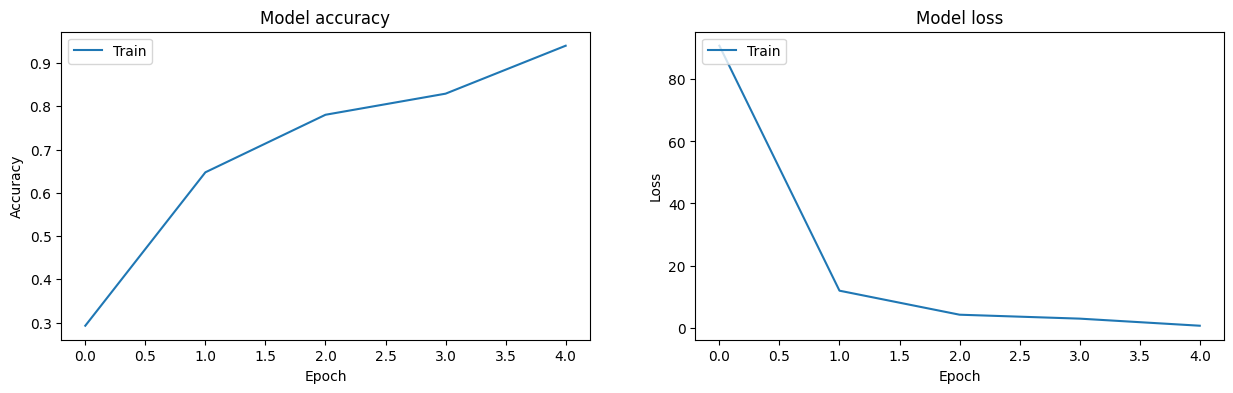

In [384]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
# Plot training accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 4) Evaluate the Model

Accuracy while training is one thing. Let's calculate accuracy against the __testing data__. If the accuracy achieved during training is much greater than what we calculate for the testing data, the model is probably overfit. This means it works well to classify training data but not testing data.

In [385]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

5/5 [==============================] - 0s 4ms/step - loss: 0.4740 - acc: 0.9333
Test accuracy: 0.9333333373069763
Test loss: 0.4739668369293213


## Single Prediction

We need to do one quick transformation of this image before we can see what the model thinks. The ```predict``` method expects a collection of images, so we create a collection of one image.

In [386]:
test_image_number = 65

img = test_images[test_image_number]
img = (np.expand_dims(img,0))
img.shape

(1, 48, 48, 1)

The shape is now a collection of 1 piece of data that is 48x48. Next, we pass our image to the ```predict``` method. The result is a list of probabilities that the image is a certain class.

In [387]:
predictions_single = model.predict(img)
predictions_single

1/1 [==============================] - 0s 47ms/step


array([[0.0000000e+00, 0.0000000e+00, 3.8093561e-21, 3.1450039e-33,
        3.9982256e-19, 9.9999988e-01, 1.1044830e-21, 0.0000000e+00,
        0.0000000e+00, 9.6802879e-08]], dtype=float32)

Those are not not very easy for us to look at. Luckily, NumPy has a handy function called `argmax` to find the index of the largest value in the list, which saves us having to look! We can use a second NumPy method to find the actual `max` value.

In [388]:
prediction_result = np.argmax(predictions_single)
probability = np.max(predictions_single)
real_result = class_names[test_labels[test_image_number]]
print(f"Predicted class {prediction_result}, which is {class_names[prediction_result]}.")
print(f"The model thinks there is a {probability*100:.2f}% probability of this brick being correct.")
print(f"Real result is {real_result}.")

Predicted class 5, which is 2x2 Macaroni.
The model thinks there is a 100.00% probability of this brick being correct.
Real result is 2x2 Macaroni.


Here are a couple of functions to help with the display of the prediction data.

In [389]:
# Function to display the prediction results in a graph:
def plot_value_array(predictions_array, true_label, image):
    predicted_label = np.argmax(predictions_array)
    predicted_probability = 100 * np.max(predictions_array)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.axis('off')
    ax1.imshow(image, cmap='gray')
    color = 'green' if predicted_label == true_label else 'red'
    ax1.set_title(f"{class_names[predicted_label]} {predicted_probability:2.0f}% ({class_names[true_label]})", color=color)
    
    plot = ax2.bar(range(len(predictions_array)), predictions_array, color="#777777")
    ax2.set_xticks(range(len(class_names)), class_names, rotation=80)
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('green')
    
    plt.show()

Let's plot a bar chart using the helper function. This gives us a sense of how well the model classified this image. The predicted label will be red if it is different than the actual label. The actual label will be green.

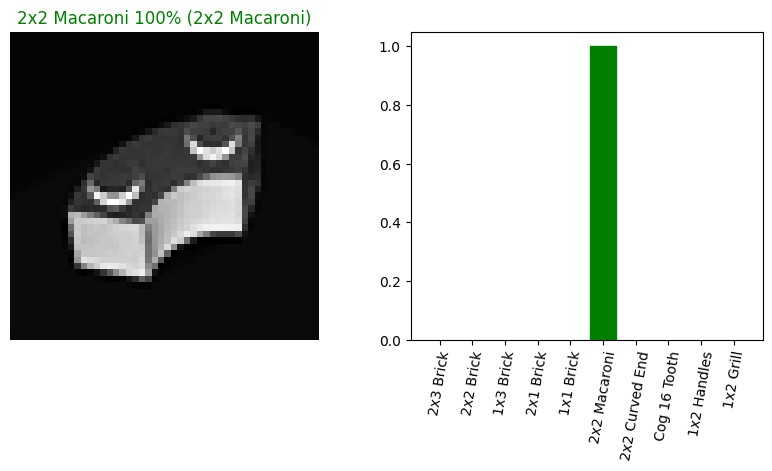

In [390]:
plot_value_array(predictions_array=predictions_single[0], 
                 true_label=test_labels[test_image_number], 
                 image=test_images[test_image_number])

## Batch Prediction

Now let's get prediction values for **all** the test images we have.

In [391]:
predictions = model.predict(test_images)
predictions

5/5 [==============================] - 0s 4ms/step


array([[0.00000000e+00, 0.00000000e+00, 9.29620805e-30, ...,
        1.03185045e-36, 3.03593723e-21, 9.54445706e-26],
       [3.02966823e-35, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.28974350e-26, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.08882889e-24, 2.96976444e-36, 4.06997949e-13],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)